In [1]:
# Data Science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.dates as mdates

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func

In [2]:
# Create engine using the `spacex.sqlite` database file
engine = create_engine("sqlite:///Resources/santa_barbara_food.sqlite")

In [3]:
# INSPECT to confirm existence

# Create the inspector and connect it to the engine
inspector_gadget = inspect(engine)

# Collect the names of tables within the database
tables = inspector_gadget.get_table_names()

# print metadata for each table
for table in tables:
    print(table)
    print("-----------")
    
    # get columns
    columns = inspector_gadget.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

santa_barbara_food
-----------
business_id TEXT
name TEXT
address TEXT
city TEXT
state TEXT
postal_code BIGINT
latitude FLOAT
longitude FLOAT
stars FLOAT
review_count BIGINT
categories TEXT
user_id TEXT
review_stars BIGINT
date TEXT



In [4]:
# build the query
select_all_query = """
                SELECT *
                FROM santa_barbara_food
                """

df = pd.read_sql(text(select_all_query), con=engine)
df.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,categories,user_id,review_stars,date
0,8-ZExybRuyyXZf6aESgc3g,Paseo Nuevo Shopping Center,651 Paseo Nuevo,Santa Barbara,CA,93101,34.418991,-119.699996,3.3,7,American (Traditional),HA4rae4Oj41vctbk5VFq8w,5,2021-03-11
1,8-ZExybRuyyXZf6aESgc3g,Paseo Nuevo Shopping Center,651 Paseo Nuevo,Santa Barbara,CA,93101,34.418991,-119.699996,3.3,7,American (Traditional),27hyqoJVv66JN_Z8pduSBA,1,2021-07-11
2,8-ZExybRuyyXZf6aESgc3g,Paseo Nuevo Shopping Center,651 Paseo Nuevo,Santa Barbara,CA,93101,34.418991,-119.699996,3.3,7,American (Traditional),E-UATD6Qg2VikGZ2Mtc7sg,1,2021-11-09
3,8-ZExybRuyyXZf6aESgc3g,Paseo Nuevo Shopping Center,651 Paseo Nuevo,Santa Barbara,CA,93101,34.418991,-119.699996,3.3,7,American (Traditional),MvfjsTrQgnCtD3xm3Yg9cw,4,2021-06-12
4,8-ZExybRuyyXZf6aESgc3g,Paseo Nuevo Shopping Center,651 Paseo Nuevo,Santa Barbara,CA,93101,34.418991,-119.699996,3.3,7,American (Traditional),Aofw4GTSxQeYtbhUwD2ZJg,2,2021-04-25


In [5]:
# Define User Inputs (x=date range, y=avg.stars of user reviews )

# Pick a restaurant name

# Default ALL
# restaurant = "All"

# User Input
restaurant = "La Super-Rica Taqueria"

# Select a date range

# Default ALL
# start_date = '2021-01-01'
# end_date = '2022-01-19'

# User Input
start_date = '2021-01-01'
end_date = '2021-10-01'


In [6]:
# Histogram variables

if restaurant == "ALL":
    where_clause = "1=1"
else:
    where_clause = "name = :restaurant"

if start_date == "ALL":
    start_clause = '2021-01-01'
else:
    start_clause = ":start_date"

if end_date == "ALL":
    end_clause = '2022-01-19'
else:
    end_clause = ":end_date"



# build the query
query = f"""
    SELECT
        name,
        review_stars,
        date
    FROM
        santa_barbara_food
    WHERE
        {where_clause}
        AND date BETWEEN {start_clause} AND {end_clause}
    ORDER BY
        name
"""

# execute query
params = {'restaurant': restaurant, 'start_date': start_date, 'end_date': end_date}
df2 = pd.read_sql(text(query), con=engine, params=params)
df2.head(10)


,name,review_stars,date
0,La Super-Rica Taqueria,4,2021-03-26
1,La Super-Rica Taqueria,5,2021-03-20
2,La Super-Rica Taqueria,5,2021-01-04
3,La Super-Rica Taqueria,3,2021-04-05
4,La Super-Rica Taqueria,5,2021-04-05
5,La Super-Rica Taqueria,3,2021-05-23
6,La Super-Rica Taqueria,2,2021-03-15
7,La Super-Rica Taqueria,2,2021-05-03
8,La Super-Rica Taqueria,5,2021-05-27
9,La Super-Rica Taqueria,5,2021-04-12


C:\Users\nb51\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


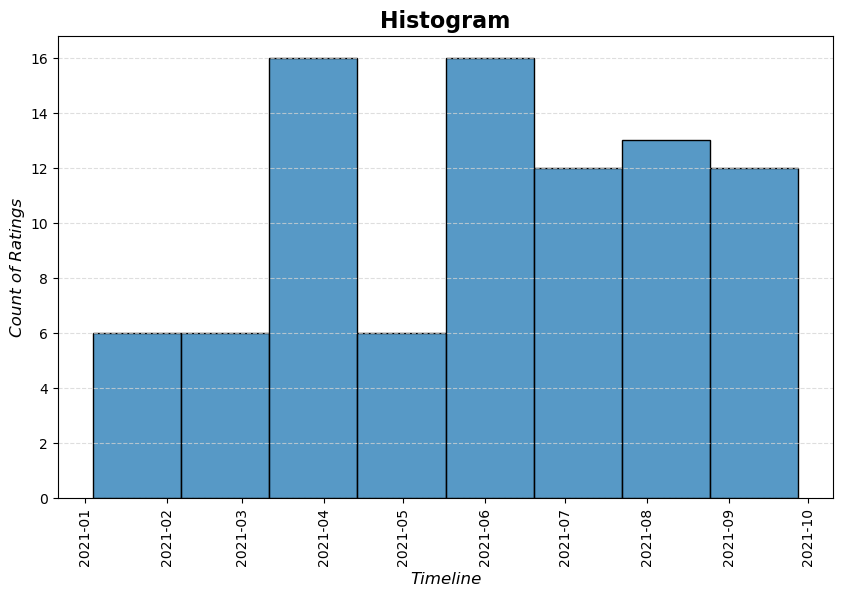

In [7]:
# Histogram
# Dataset
df.date = pd.to_datetime(df['date'])
df2.date = pd.to_datetime(df2['date'])

# Plot for chart_data
plt.figure(figsize=(10,6))
sns.histplot(df2, x='date')

# customizations
plt.title("Histogram", fontsize=16, fontweight="bold")
plt.xlabel("Timeline", fontstyle="italic", fontsize=12)
plt.ylabel("Count of Ratings", fontstyle="italic", fontsize=12)

# Format the x-axis dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Set major ticks every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format ticks as 'YYYY-MM'

plt.xlim()
plt.ylim()
plt.xticks(rotation=90)
plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.75)

# save chart in Charts folder
# plt.savefig('../Charts/success_vs_failure_US.png', bbox_inches='tight')

# show
plt.show()

In [8]:
# Leaderboard Table Viz

In [9]:
# user inputs
min_stars = 0

# build the query
query = f"""
    SELECT DISTINCT
        name,
        address,
        categories as category,
        latitude,
        longitude,
        stars,
        review_count as total_reviews
    FROM
        santa_barbara_food
    WHERE
        stars >= {min_stars}
    ORDER BY
        stars DESC;
"""

df = pd.read_sql(text(query), con = engine)
df.head()

,name,address,category,latitude,longitude,stars,total_reviews
0,"Villa Craft Beer, Wine & Kitchen",618 Anacapa St,American (New),34.419541,-119.696359,5.0,5
1,Gloria's Gourmet Kitchen,631 W Carrillo St,Mexican,34.414603,-119.710093,5.0,2
2,Plow & Angel,900 San Ysidro Ln,"American (New), American (Traditional)",34.446803,-119.623098,5.0,1
3,Daniel's Bakery and Mexican Food,2714 De La Vina St,Mexican,34.436025,-119.725478,5.0,1
4,Blue Corn Tacos Catering,None,Mexican,34.420334,-119.710749,5.0,5


In [10]:
# Donut Chart

min_stars = 0
query = f"""
    SELECT categories, COUNT(*) as count
    FROM santa_barbara_food
    WHERE stars >= {min_stars}
    GROUP BY categories
    ORDER BY count DESC;
    """

df = pd.read_sql(text(query), con = engine)
df.head()

,categories,count
0,Mexican,1971
1,American (New),1880
2,Italian,849
3,American (Traditional),820
4,Japanese,624


C:\Users\nb51\AppData\Local\Temp\ipykernel_25492\4217342803.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_df['percentage'] = (top_5_df['count'] / total_top_5) * 100


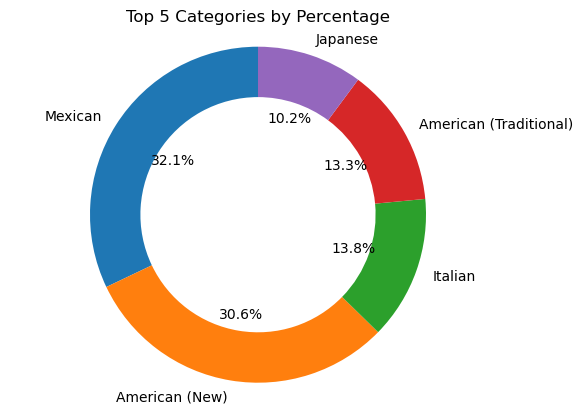

In [11]:
# Get the top 5 categories
top_5_df = df.head(5)

# Calculate the total count of the top 5 categories
total_top_5 = top_5_df['count'].sum()

# Calculate the percentages for the top 5 categories
top_5_df['percentage'] = (top_5_df['count'] / total_top_5) * 100

# Create the donut chart
fig, ax = plt.subplots()

# Plot a pie chart
wedges, texts, autotexts = ax.pie(
    top_5_df['percentage'],
    labels=top_5_df['categories'],
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.3)
)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Add a title
plt.title('Top 5 Categories by Percentage')

# Show the chart
plt.show()